# import data

In [117]:
# EDA and plotting libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# Scikit-Learn estimators 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression # Regression might seem counterintuitive, but we'll address this later
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

# Model Evaluations
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score # Separate lines to keep everyting "Pythonic"
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV 

# To handle warnings 
import warnings
warnings.filterwarnings('ignore')

In [118]:
x_df = pd.read_csv('healthcare-dataset-stroke-data.csv')
x_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Penjelasan dari setiap columns/label
1) id: pengenal unik
2) jenis kelamin: Pria, Wanita, other
3) usia: usia pasien
4) hipertensi: 0 jika pasien tidak memiliki hipertensi, 1 jika pasien memiliki hipertensi
5) penyakit_jantung: 0 jika pasien tidak memiliki penyakit jantung, 1 jika pasien memiliki penyakit jantung
6) pernah_menikah: "Tidak" atau "Ya"
7) jenis_pekerjaan: "anak-anak", "PNS", "Tidak pernah bekerja", "Swasta" atau "Wiraswasta"
8) Jenis_Tempat_Tinggal: "Pedesaan" atau "Perkotaan"
9) avg_glucose_level: kadar glukosa rata-rata dalam darah
10) bmi: indeks massa tubuh
11) status_merokok: "pernah merokok", "tidak pernah merokok", "merokok" atau "Tidak diketahui "*
12) stroke: 1 jika pasien mengalami stroke atau 0 jika tidak

tujuan dari klasifikasi dari data stroke ini adalah
Mengingat parameter klinis dan pribadi seorang pasien, dapatkah kita memprediksi apakah pasien tersebut terkena stroke atau tidak, Jika terkena stroke di simbolkan dengan angka 1 dan jika tidak terkena stroke di simbolkan dengan angka 0

Klasifikasi:mengelompokkan atau mengkategorikan data ke dalam kelas atau kategori berdasarkan atribut-atribut tertentu. Tujuan akhir dari klasifikasi adalah untuk memprediksi kelas atau label dari data yang belum dikenal berdasarkan pola dan informasi yang ditemukan dalam data pelatihan.

Label:Stroke atau Tidak stroke yang ditandai 1 atau 0

Pemahaman Data menggunakan EDA
EDA adalah sebuah pendekatan atau proses dalam analisis data yang digunakan untuk memahami dan menganalisis dataset sebelum menerapkan model atau statistik inferensial yang lebih lanjut

# PEMAHAMAN DATA (EDA)

In [119]:
x_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [120]:
# jumlah pasien stroke(1) . non-stroke(0) dalam kumpulan data
x_df["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

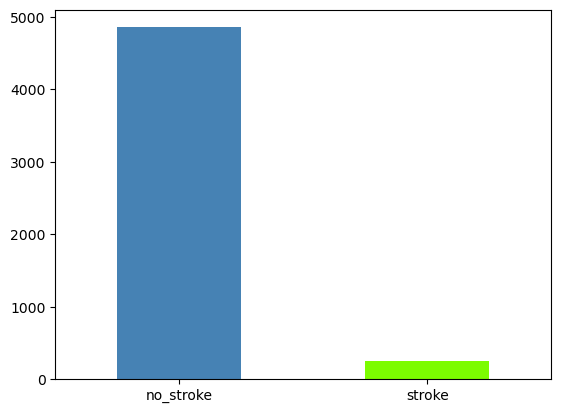

In [121]:
    st_plot = x_df["stroke"].value_counts().plot(kind="bar",color=["steelblue","lawngreen"], rot=0)
    plt.xticks(ticks=[1,0], labels=["stroke", "no_stroke"]);

In [122]:
x_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [123]:
x_df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [124]:
x_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [125]:
#Membandingkan gender dengan kolom target (stroke).
pd.crosstab(x_df.stroke, x_df.gender)

gender,Female,Male,Other
stroke,,,
0,2853,2007,1
1,141,108,0


In [126]:
# Mencari tahu baris Other
x_df[x_df["gender"] == "Other"]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [127]:
# Membuang nilai Id
x_df.drop(x_df[x_df['id'] == 56156].index, inplace=True)

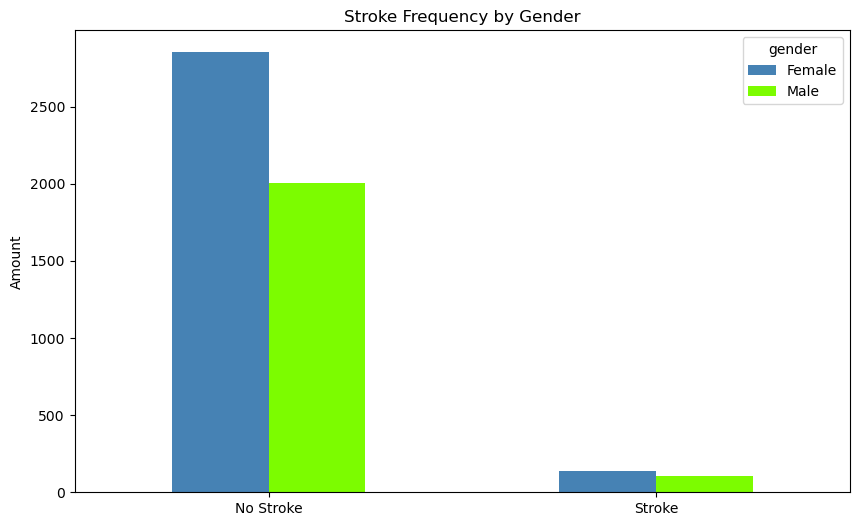

In [128]:
# Visualisasikan tab silang gender dari atas
pd.crosstab(x_df.stroke, x_df.gender).plot(kind='bar',
                                       figsize=(10,6), 
                                       color=["steelblue","lawngreen"],
                                       rot=0)

# Styling
plt.title("Stroke Frequency by Gender")
plt.xticks(ticks=[0,1],labels=["No Stroke", "Stroke"])
plt.xlabel(None)
plt.ylabel("Amount");

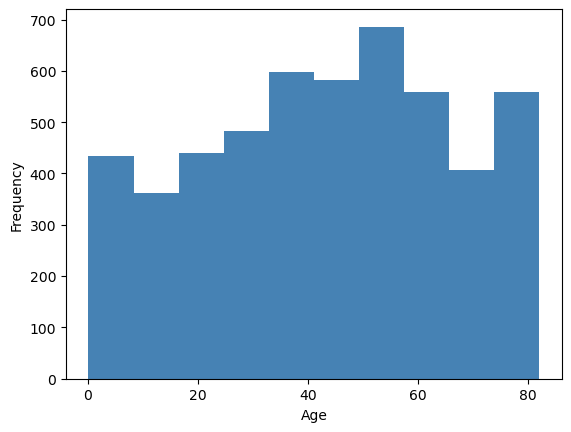

In [129]:
# Mari kita lihat distribusi ini berdasarkan usia 
x_df["age"].plot.hist(color="steelblue")
plt.xlabel("Age");

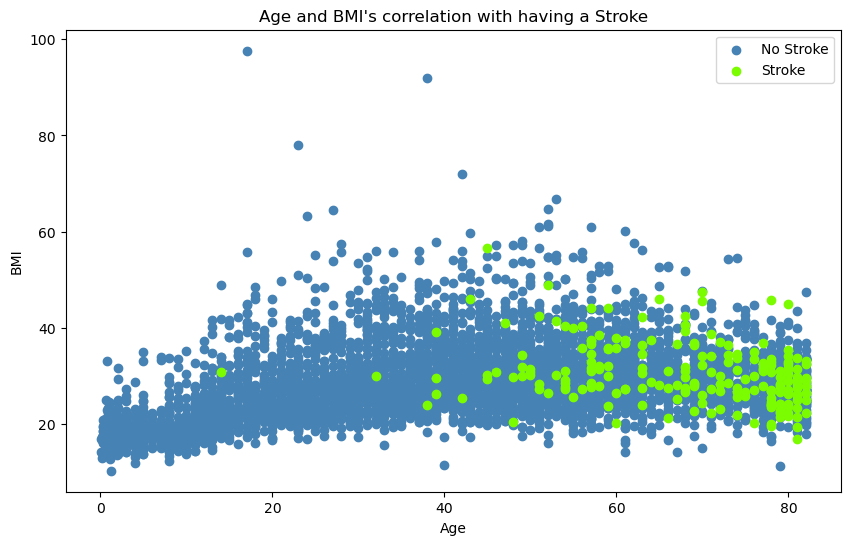

In [130]:
plt.figure(figsize=(10,6))

# Usia dan BMI untuk orang yang belum pernah terkena stroke
plt.scatter(x_df.age[x_df.stroke==0], 
            x_df.bmi[x_df.stroke==0],
            c="steelblue")

# Usia dan BMI untuk oraong yang sudah terkena stroke
plt.scatter(x_df.age[x_df.stroke==1], 
            x_df.bmi[x_df.stroke==1],
            c="lawngreen")

# Styling
plt.title("Age and BMI's correlation with having a Stroke")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.legend(["No Stroke", "Stroke"]);

In [131]:
# Melihat kolom lain dalam kerangka data untuk memutuskan apa yang akan dijelajahi selanjutnya
x_df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

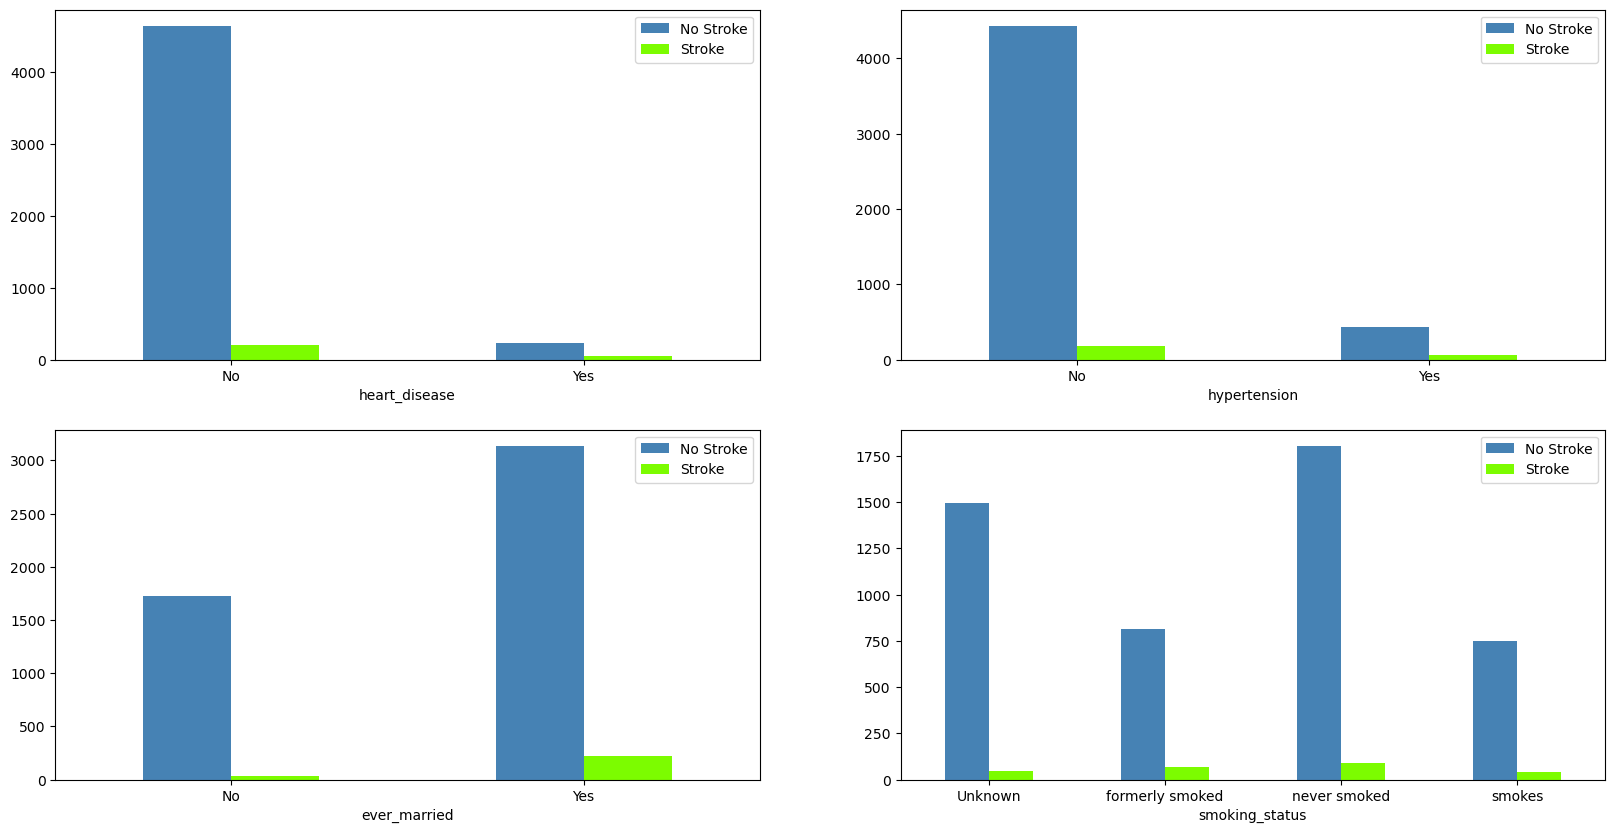

In [132]:
# Membuat beberapa info tab silang untuk beberapa kolom yang tersisa
ct1 = pd.crosstab(x_df.heart_disease,x_df.stroke)
ct2 = pd.crosstab(x_df.hypertension,x_df.stroke)
ct3 = pd.crosstab(x_df.ever_married,x_df.stroke)
ct4 = pd.crosstab(x_df.smoking_status,x_df.stroke)

# Setting the colors
colors = ["steelblue","lawngreen"]

#Menyiapkan gambar dan sumbu yang berbeda pada gambar
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,
                                          ncols=2, 
                                          figsize=(20,10))

# Merencanakan setiap tab silang pada sumbu yang berbeda
ct1.plot(kind='bar',ax=ax1,color=colors,rot=0)
ct2.plot(kind='bar',ax=ax2,color=colors,rot=0)
ct3.plot(kind='bar',ax=ax3,color=colors,rot=0)
ct4.plot(kind='bar',ax=ax4,color=colors,rot=0);

# Menetapkan label x untuk penyakit jantung dan hipertensi
ax1.set_xticklabels(["No","Yes"])
ax2.set_xticklabels(["No","Yes"])

# Changing the lables of the legend
ax1.legend(labels=['No Stroke', 'Stroke'])
ax2.legend(labels=['No Stroke', 'Stroke'])
ax3.legend(labels=['No Stroke', 'Stroke'])
ax4.legend(labels=['No Stroke', 'Stroke']);

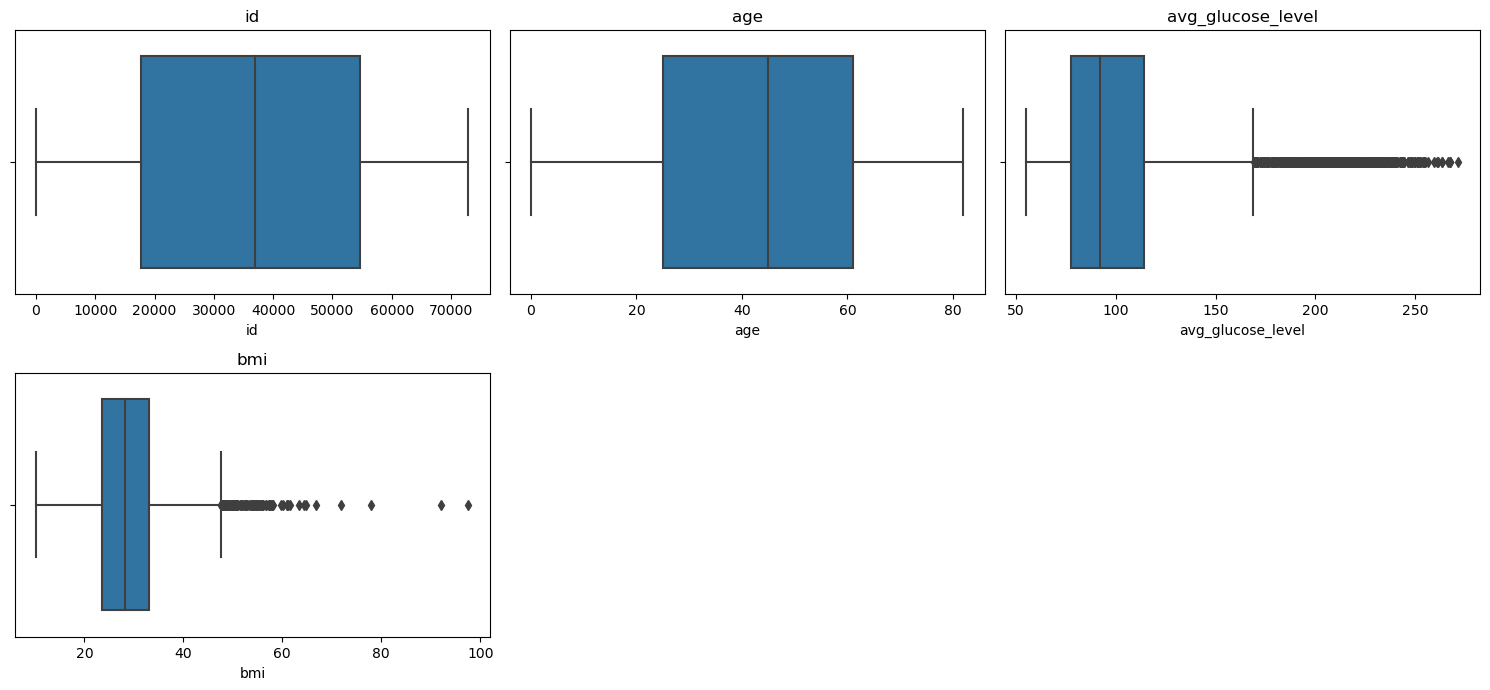

In [133]:
parameters = ['id', 'age', 'avg_glucose_level', 'bmi']
plt.figure(figsize=(15, 10))

for i, parameter in enumerate(parameters):
    plt.subplot(3, 3, i % 9 + 1)  # Adjust the 3x3 grid layout
    sns.boxplot(x=x_df[parameter])
    plt.title(parameter)
    
    if i % 3 == 2 or i == len(parameters) - 1:
        plt.tight_layout()

plt.show()

In [134]:
# Membuat matriks korelasi kita
#1: Korelasi positif sempurna; artinya, dua variabel bergerak bersama-sama dengan sempurna.
# 0 :Tidak ada korelasi; variabel-variabel tersebut tidak memiliki hubungan linier.
x_df.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003677,0.003610,-0.001253,0.000943,0.003238,0.006430
age,0.003677,1.000000,0.276367,0.263777,0.238323,0.333314,0.245239
hypertension,0.003610,0.276367,1.000000,0.108292,0.174540,0.167770,0.127891
heart_disease,-0.001253,0.263777,0.108292,1.000000,0.161907,0.041322,0.134905
avg_glucose_level,0.000943,0.238323,0.174540,0.161907,1.000000,0.175672,0.131991
bmi,0.003238,0.333314,0.167770,0.041322,0.175672,1.000000,0.042341
stroke,0.006430,0.245239,0.127891,0.134905,0.131991,0.042341,1.000000


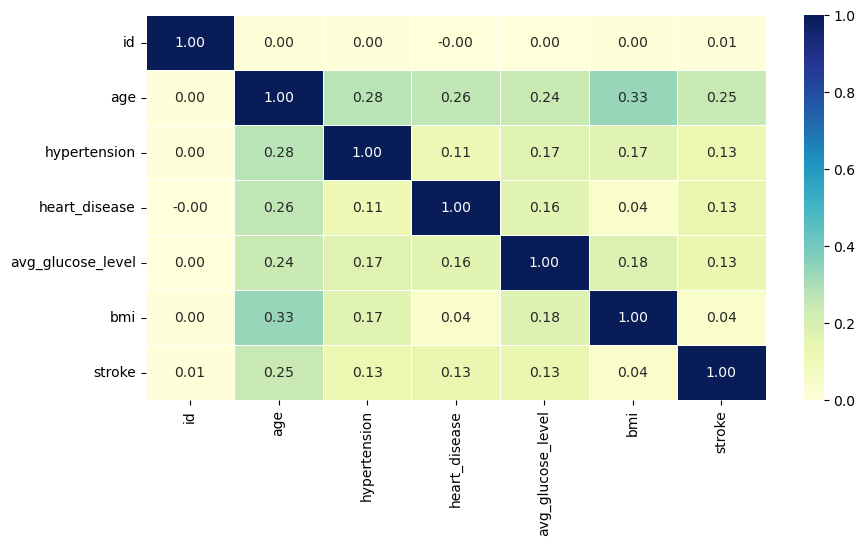

In [135]:
# Mari kita membuat matriks korelasi menjadi sebuah peta panas
corr_matrix = x_df.corr() 
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap(corr_matrix,
                 annot=True, 
                 linewidths=0.5,
                 fmt=".2f", 
                 cmap="YlGnBu" 
                );

# PEMRORESAN DATA

In [136]:
# Drop children stroke
x_children_stroke_df = x_df[(x_df['age'] < 20 ) & (x_df['stroke'] == 1)]
x_df = x_df.drop(x_children_stroke_df.index)

In [137]:
x_df.drop("id", axis=1, inplace=True)

In [138]:
x_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [139]:
x_df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  200
smoking_status         0
stroke                 0
dtype: int64

In [140]:
categorical_cols = ['gender','ever_married','work_type','Residence_type','smoking_status']

if 'Residence_type' in x_df.columns:
    x_df = x_df.drop(columns='Residence_type') #Dari percobaan kami: 'Tipe_Tempat_Tinggal' menambahkan lebih banyak noise daripada informasi yang relevan
x_df = pd.get_dummies(x_df)
x_df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,1,0,0,1,0,0,0,1,0,0
1,61.0,0,0,202.21,NaN,1,1,0,0,1,0,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,0,1,0,1,0,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,1,0,0,1,0,0,1,0,0,0,0,0,1
4,79.0,1,0,174.12,24.0,1,1,0,0,1,0,0,0,1,0,0,0,1,0


Rasio ppl yang kelebihan berat badan terhadap kelas positif : 68.70%
Rasio ppl dengan berat badan kurang terhadap kelas positif : 0.41%
Rasio ppl normal terhadap kelas positif : 15.04%
Rasio ppl BMI yang HILANG di atas kelas positif : 15.85%


<AxesSubplot:xlabel='stroke', ylabel='bmi'>

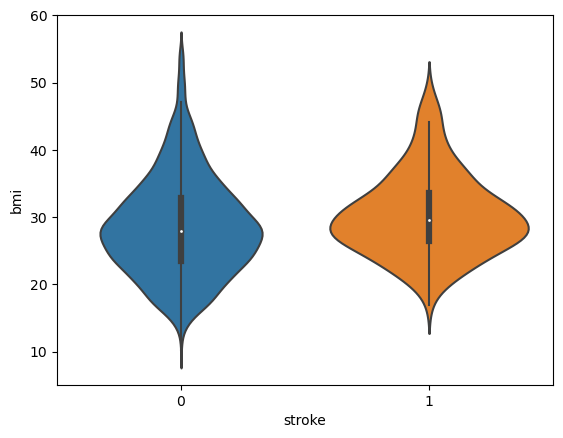

In [141]:
NORMAL = 18.5 # Semua nilai bmi di bawah 18,5 mengacu pada berat badan kurang
OVERWEIGHT = 25 #Ini di kategorikan sebagai overweight atau kelebihan berat badan.
OBESE_1 = 30 #ini dikategorikan BMI yang dianggap sebagai obesitas tahap 1
OBESE_2 = 35
OBESE_3 = 40
MAX_BMI = 55 # Ini adalah ambang batas maksimum dalam analisis


x_df = x_df[(x_df['bmi'].isnull()) | (x_df['bmi'] < MAX_BMI)] # Menyaring outlier BMI
x_overweight_df = x_df[x_df['bmi'] > OVERWEIGHT]
x_underweight_df = x_df[x_df['bmi'] <= NORMAL]
x_test_df = x_df[(x_df['bmi'] > NORMAL) & (x_df['bmi'] <= OVERWEIGHT )]
x_null_df = x_df[x_df['bmi'].isnull()]
    


print('Rasio ppl yang kelebihan berat badan terhadap kelas positif : {:.02f}%'.format(100 * (x_overweight_df['stroke'].sum() / x_df['stroke'].sum())))
print('Rasio ppl dengan berat badan kurang terhadap kelas positif : {:.02f}%'.format(100 * (x_underweight_df['stroke'].sum() / x_df['stroke'].sum())))
print('Rasio ppl normal terhadap kelas positif : {:.02f}%'.format(100 * (x_test_df['stroke'].sum() / x_df['stroke'].sum())))
print('Rasio ppl BMI yang HILANG di atas kelas positif : {:.02f}%'.format(100 * (x_null_df['stroke'].sum() / x_df['stroke'].sum())))

sns.violinplot(data=x_df,x='stroke',y='bmi')

In [142]:
# Daftar kolom dengan outliers
kolom_dengan_outliers = ['avg_glucose_level', 'bmi'] 

# Melakukan log transformasi pada kolom-kolom dengan outliers
for kolom in kolom_dengan_outliers:
    x_df[kolom] = np.log1p(x_df[kolom])  # Menggunakan np.log1p untuk menghindari log dari 0

display(x_df)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,5.436731,3.627004,1,0,1,0,1,0,0,1,0,0,0,1,0,0
1,61.0,0,0,5.314240,NaN,1,1,0,0,1,0,0,0,1,0,0,0,1,0
2,80.0,0,1,4.672081,3.511545,1,0,1,0,1,0,0,1,0,0,0,0,1,0
3,49.0,0,0,5.148831,3.566712,1,1,0,0,1,0,0,1,0,0,0,0,0,1
4,79.0,1,0,5.165471,3.218876,1,1,0,0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,4.439706,NaN,0,1,0,0,1,0,0,1,0,0,0,0,1,0
5106,81.0,0,0,4.837868,3.713572,0,1,0,0,1,0,0,0,1,0,0,0,1,0
5107,35.0,0,0,4.430698,3.453157,0,1,0,0,1,0,0,0,1,0,0,0,1,0
5108,51.0,0,0,5.119729,3.280911,0,0,1,0,1,0,0,1,0,0,0,1,0,0


In [143]:
x_df.dropna(inplace = True)

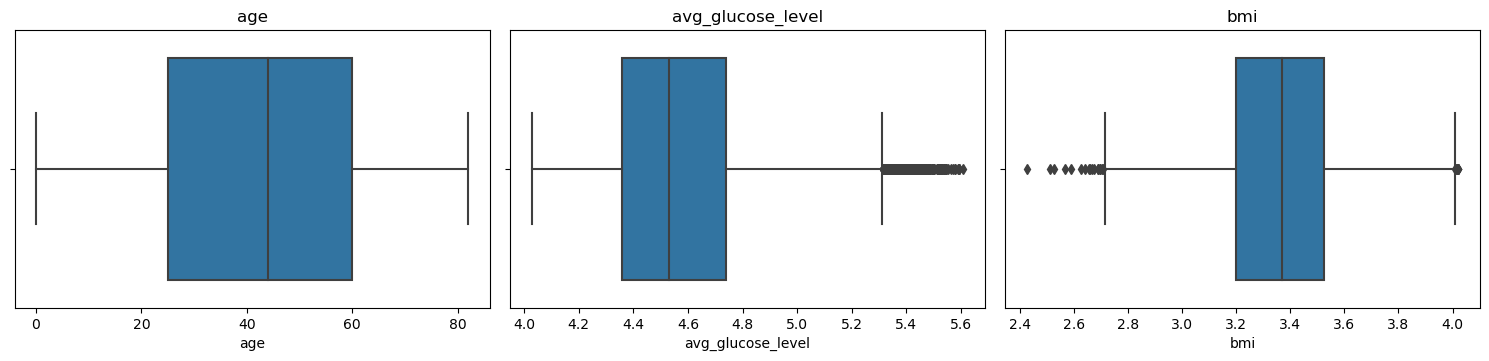

In [144]:
parameters = ['age' , 'avg_glucose_level', 'bmi', ]
plt.figure(figsize=(15, 10))

for i, parameter in enumerate(parameters):
    plt.subplot(3, 3, i % 9 + 1)  # Adjust the 3x3 grid layout
    sns.boxplot(x=x_df[parameter])
    plt.title(parameter)
    
    if i % 3 == 2 or i == len(parameters) - 1:
        plt.tight_layout()

plt.show()

In [145]:
x_df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,4872.000000,4872.000000,4872.000000,4872.000000,4872.000000,4872.000000,4872.000000,4872.000000,4872.000000,4872.000000,4872.000000,4872.000000,4872.000000,4872.000000,4872.000000,4872.000000,4872.000000,4872.000000,4872.000000
mean,42.877488,0.090722,0.049877,4.596573,3.359415,0.042488,0.589491,0.410509,0.348112,0.651888,0.128489,0.004516,0.571223,0.158251,0.137521,0.302340,0.170772,0.376847,0.150041
std,22.610301,0.287244,0.217713,0.353103,0.248047,0.201720,0.491977,0.491977,0.476421,0.476421,0.334668,0.067053,0.494952,0.365014,0.344431,0.459319,0.376348,0.484646,0.357148
min,0.080000,0.000000,0.000000,4.027492,2.424803,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,4.357702,3.198673,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,44.000000,0.000000,0.000000,4.529153,3.367296,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,60.000000,0.000000,0.000000,4.739723,3.523415,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,82.000000,1.000000,1.000000,5.608519,4.021774,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [146]:
x_df.isna().sum()

age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
stroke                            0
gender_Female                     0
gender_Male                       0
ever_married_No                   0
ever_married_Yes                  0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

In [147]:
#Split Data Set
x,y = x_df.drop(columns='stroke'), x_df['stroke']

x_train, x_val, y_train, y_val = train_test_split(x,y, test_size=0.2, random_state = 42, shuffle = True, stratify=y)
print("Train shape : {}\nValidation Shape : {}".format(x_train.shape, x_val.shape))
print("Positive # samples : {}".format(np.count_nonzero(y_val == 1)))

Train shape : (3897, 18)
Validation Shape : (975, 18)
Positive # samples : 41


# Penerapan Metode Klasifikasi

In [148]:
from sklearn.metrics import recall_score, f1_score, precision_score, accuracy_score, average_precision_score
from sklearn.metrics import precision_recall_curve, auc
from matplotlib import pyplot as plt

def plot_metrics(targets,predictions):
    print("Validation accuracy : {:.4f}".format(accuracy_score(targets, predictions)))
    print("Validation recall : {:.4f}".format(recall_score(targets,predictions)))
    print("Validation precision : {:.4f}".format(precision_score(targets,predictions)))
    print("Validation f1-score : {:.4f}".format(f1_score(targets,predictions)))
    precision, recall, _ = precision_recall_curve(targets, predictions)
    pr_auc = auc(recall,precision) # NB: average_precision_score (y_val, prediksi) juga memberikan presisi / recall "AUC"
    print("Validation auc : {:.4f}".format(pr_auc))

# LOGISTIC REGRESSION

In [149]:
#sekala timbangan 

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

In [150]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=1,random_state=42,class_weight='balanced')
clf.fit(x_train, y_train)
predictions = clf.predict(x_val)
plot_metrics(y_val, predictions)

Validation accuracy : 0.7303
Validation recall : 0.8537
Validation precision : 0.1199
Validation f1-score : 0.2102
Validation auc : 0.4898


<BarContainer object of 18 artists>

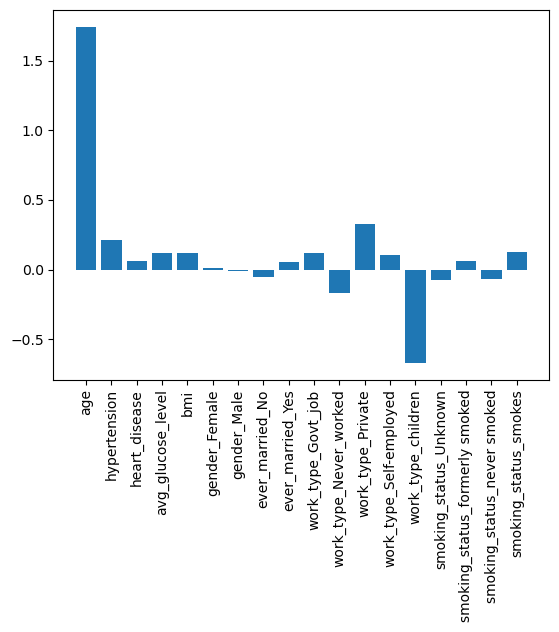

In [151]:
# Features impotance
plt.xticks(rotation=90)
plt.bar(x.columns, clf.coef_[0])

# DECISION TREE

In [152]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt_clf.fit(x_train,y_train)
predictions = dt_clf.predict(x_val)
plot_metrics(y_val, predictions)

Validation accuracy : 0.9292
Validation recall : 0.0732
Validation precision : 0.0882
Validation f1-score : 0.0800
Validation auc : 0.1002


# SVM 

In [153]:
from sklearn.svm import LinearSVC
svm_clf = LinearSVC(C=0.01, class_weight ='balanced')
svm_clf.fit(x_train, y_train)

# Evaluation
predictions = svm_clf.predict(x_val)
plot_metrics(y_val, predictions)

Validation accuracy : 0.7272
Validation recall : 0.8537
Validation precision : 0.1186
Validation f1-score : 0.2083
Validation auc : 0.4892


<BarContainer object of 18 artists>

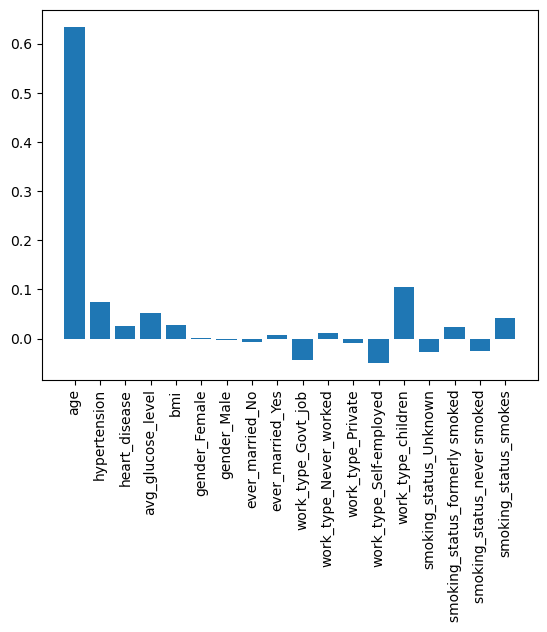

In [154]:
# Features impotance
plt.xticks(rotation=90)
plt.bar(x.columns, svm_clf.coef_[0])

# NON LINEAR SVM

In [155]:
from sklearn.svm import SVC
svm_clf = SVC(C=1, class_weight ='balanced', kernel='rbf',gamma='auto')
svm_clf.fit(x_train, y_train)

# Evaluation
predictions = svm_clf.predict(x_val)
plot_metrics(y_val, predictions)

Validation accuracy : 0.7610
Validation recall : 0.6341
Validation precision : 0.1066
Validation f1-score : 0.1825
Validation auc : 0.3780


# EVALUATION/EVALUASI

In [166]:
# Menginstansiasi kelas Linear SVC yang terpisah
clf = LogisticRegression()

# Menyesuaikan model
clf.fit(x_train,y_train)

# Memberi skor untuk memastikannya sesuai dengan yang di atas
clf.score(x_val,y_val)

0.9579487179487179

In [167]:
# Membuat prediksi dengan model teratas kami 
y_preds = clf.predict(x_val)

# Apa yang diprediksi oleh mesin untuk nilai target
y_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

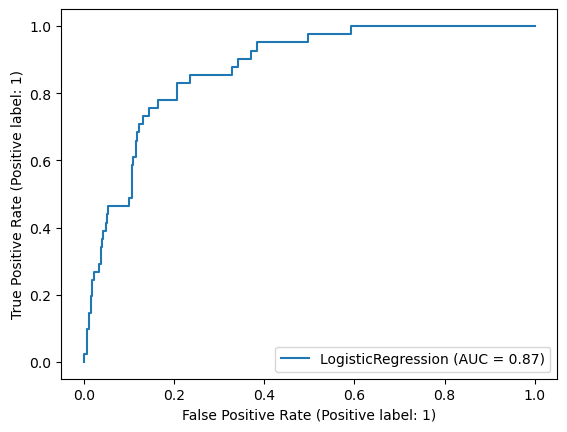

In [168]:
# ROC curve and AUC 
plot_roc_curve(clf,x_val,y_val);

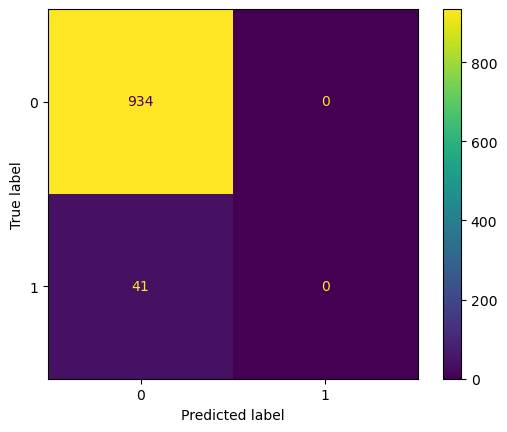

In [169]:
# Let's check out the confusion matrix 
plot_confusion_matrix(clf,x_val,y_val)

In [170]:
# Laporan Klasifikasi 
print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

           0       0.98      0.77      0.86       934
           1       0.11      0.63      0.18        41

    accuracy                           0.76       975
   macro avg       0.54      0.70      0.52       975
weighted avg       0.94      0.76      0.83       975



In [171]:
# Membuat fungsi untuk menilai skor presisi, recall, dan f1 dengan validasi silang 
metrics = ["accuracy","recall","precision","f1",]
def cv_scores(metrics): 
    """
    Performs cross validation on the data and returns the mean score.
    """
    for metric in metrics:
        scores = cross_val_score(clf, x, y, cv=5, scoring=metric)
        print(f"{metric}: {scores.mean():.3f}")
        
        
cv_scores(metrics)

accuracy: 0.958
recall: 0.010
precision: 0.267
f1: 0.019


In [172]:
# Periksa koefisien
clf.coef_

array([[ 1.60457012,  0.15403357,  0.05318181,  0.16767151,  0.0389799 ,
        -0.01849366,  0.01849366, -0.01380743,  0.01380743,  0.04383971,
        -0.09282273,  0.22702127, -0.01805955, -0.33361922, -0.12311678,
         0.0340118 , -0.0040783 ,  0.12789255]])

In [173]:
# Memetakan koefisien ke kolom-kolomfeature_dict = dict(zip(x_df.columns, list(clf.coef_[0])))
feature_dict = dict(zip(x_df.columns, list(clf.coef_[0])))
feature_dict

{'age': 1.6045701203195806,
 'hypertension': 0.1540335651980313,
 'heart_disease': 0.053181806609574174,
 'avg_glucose_level': 0.16767151242159117,
 'bmi': 0.038979903667181806,
 'stroke': -0.0184936592183011,
 'gender_Female': 0.018493659218300717,
 'gender_Male': -0.013807429573565707,
 'ever_married_No': 0.013807429573565712,
 'ever_married_Yes': 0.04383971476716649,
 'work_type_Govt_job': -0.0928227334258703,
 'work_type_Never_worked': 0.2270212690656156,
 'work_type_Private': -0.018059554033589123,
 'work_type_Self-employed': -0.33361921510865816,
 'work_type_children': -0.12311678274232042,
 'smoking_status_Unknown': 0.03401180075473207,
 'smoking_status_formerly smoked': -0.0040782989951488385,
 'smoking_status_never smoked': 0.12789255442188835}

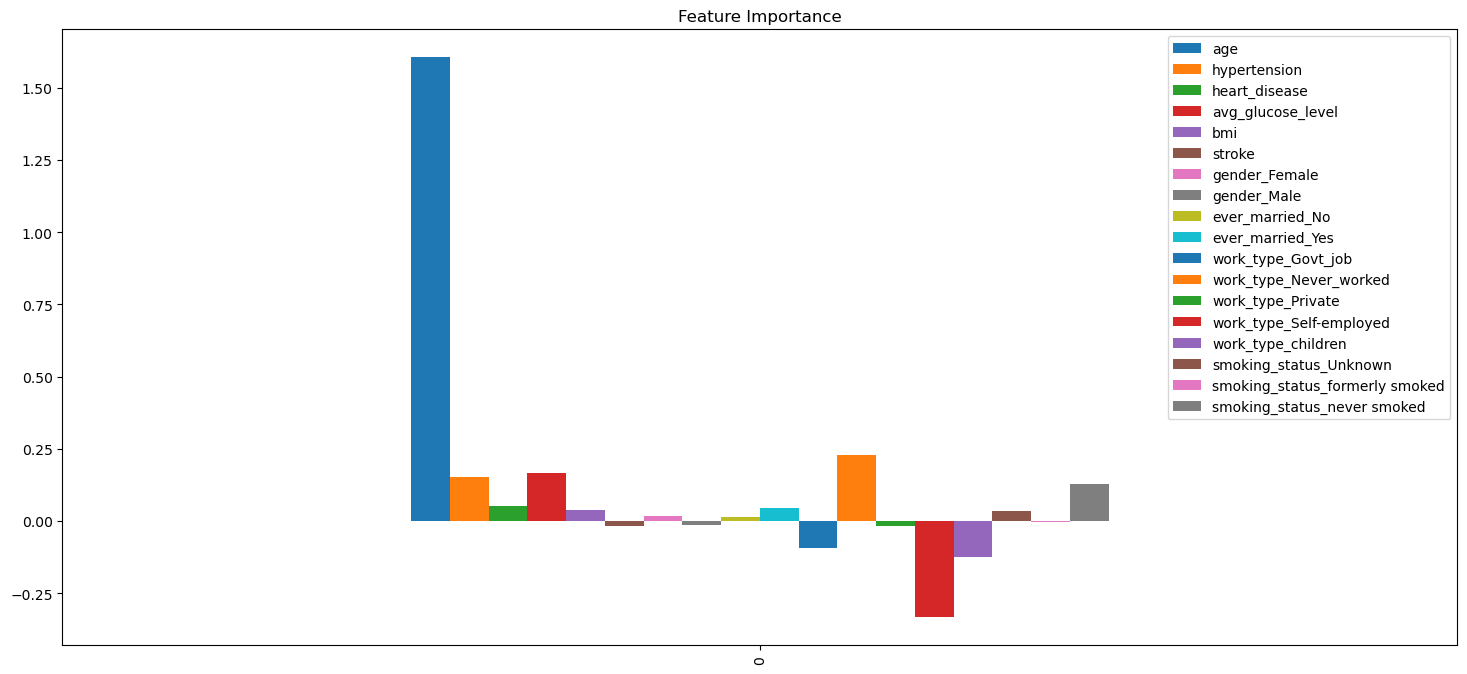

In [174]:
# Memvisualisasikan Pentingnya Fitur 
feature_df = pd.DataFrame(feature_dict,index=[0])

feature_df.plot.bar(title = "Feature Importance",figsize = (18,8));

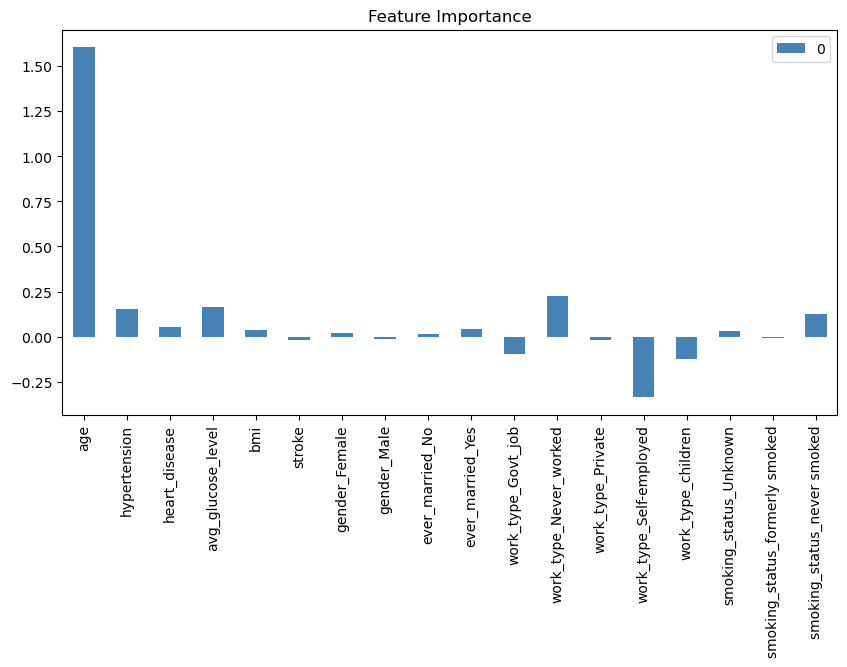

In [175]:
# Mari kita coba mengubahnya 
feature_df.T.plot.bar(title = "Feature Importance", figsize = (10,5), color = "Steelblue");